# Projet Data Science HMIN232 - 2020/2021
Ce projet a pour but de proposer des modèles de classification supervisée d'assertions faites
par des figures politiques selon leur valeur de véracité, ou autrement dit, de proposer une
approche de fact-checking automatique.

Groupe : 

## **Installation**

In [1]:
# Importation des différentes librairies, classes et fonctions utilespour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# librairies générales
import pandas as pd
import re
from tabulate import tabulate
import time
import numpy as np
import pickle
import string
import base64

# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns

# librairies scikit learn
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# librairies des classifiers utilisés
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# librairies NLTK
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize 

 
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

    

[nltk_data] Downloading package wordnet to /home/silver/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/silver/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/silver/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# fonctions utilities (affichage, confusion, etc.)
from MyNLPUtilities import *


## les Données

Suite a une analyse des donnés communiqués dans le fichier csv ,nous avons décidé d'utiliser la platforme afin de télécharger les données contenant les valeur de véracités,tout en profitant du fait que ces dérniére sont plus propres que c'elles du fichier csv.



## 1 Importation des donnés


 le data frame est composé de 24454 lignes et 14 colonnes
 le data frame est composé de 24452 lignes et 14 colonnes
2    10000
1    10000
3     4452
Name: truthRating, dtype: int64


,id,text,date,truthRating,ratingName,author,headline,named_entities_claim,named_entities_article,keywords,source,sourceURL,link,language
0,http://data.gesis.org/claimskg/claim_review/36...,'There will be no public funding for abortion ...,2010-03-21,3,TRUE,Bart Stupak,Stupak revises abortion stance on health care ...,"Abortion rights,Barack Obama,Bart Stupak,Ben N...",abortion,"Abortion,Health Care",politifact,http://www.politifact.com,http://www.politifact.com/truth-o-meter/statem...,English
1,http://data.gesis.org/claimskg/claim_review/e6...,Central Health 'is the only hospital district ...,2011-03-15,3,TRUE,Wayne Christian,State Rep. Wayne Christian says Central Health...,"Austin American-Statesman,Harris County Hospit...",NaN,Abortion,politifact,http://www.politifact.com,http://www.politifact.com/texas/statements/201...,English
2,http://data.gesis.org/claimskg/claim_review/e0...,Says most of Perry's chiefs of staff have been...,2010-08-14,3,TRUE,Bill White,Bill White says most of Gov. Rick Perry's chie...,"AT&T,Bill Clements,Bill White,Bracewell & Giul...",NaN,Ethics,politifact,http://www.politifact.com,http://www.politifact.com/texas/statements/201...,English
3,http://data.gesis.org/claimskg/claim_review/48...,Says 'as Co-Chair of the Joint Ways & Means Co...,2012-09-28,3,TRUE,Mary Nolan,Did Mary Nolan secure funding for Milwaukie br...,"Carolyn Tomei,Dave Hunt,Fetsch,Jeff Merkley,Ka...",Portland-Milwaukie Light Rail project,"State Budget,State Finances,Transportation",politifact,http://www.politifact.com,http://www.politifact.com/oregon/statements/20...,English
4,http://data.gesis.org/claimskg/claim_review/80...,Says Gary Farmer’s claim that he 'received an ...,2016-07-08,3,TRUE,Jim Waldman,Florida Senate candidate never actually receiv...,"Gary Farmer,Gwyndolen Clarke-Reed,Jim Waldman,...",Gary Farmer,Guns,politifact,http://www.politifact.com,http://www.politifact.com/florida/statements/2...,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24449,http://data.gesis.org/claimskg/claim_review/41...,'The city that I was mayor of was 50 percent L...,2018-06-07,2,MIXTURE,Lou Barletta,Hazleton wasn’t half-Latino when Lou Barletta ...,"Barletta,Bob Casey,Fox Business Network,Hazlet...",Latino,Immigration,politifact,http://www.politifact.com,http://www.politifact.com/pennsylvania/stateme...,English
24450,http://data.gesis.org/claimskg/claim_review/9e...,A set of images show a congenital anomaly that...,Unknown,2,MIXTURE,Unknown,Is This a Real Hand With Eight Fingers?,"American Society for Surgery of the Hand,Bilas...",NaN,"hands, Medical, medical anomalies, mirror hand",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/real-hand-ei...,English
24451,http://data.gesis.org/claimskg/claim_review/1a...,'You see 34 people (are) murdered every single...,2012-12-23,2,MIXTURE,Cory Booker,Cory Booker says 34 Americans are killed by gu...,"ABC,Centers for Disease Control and Prevention...",NaN,"Crime,Guns",politifact,http://www.politifact.com,http://www.politifact.com/new-jersey/statement...,English
24452,http://data.gesis.org/claimskg/claim_review/28...,'White men have committed more mass shootings ...,2017-10-02,2,MIXTURE,Newsweek,Are white males responsible for more mass shoo...,"2015 San Bernardino shooting,Aurora, Colo,Foll...",NaN,Guns,politifact,http://www.politifact.com,http://www.politifact.com/punditfact/statement...,English


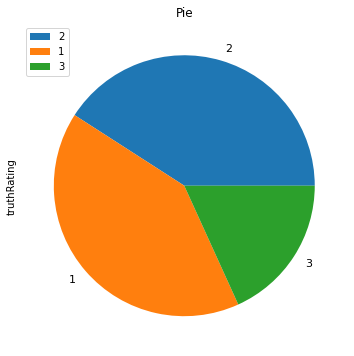

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv (r'Rendu/DATASETS/data_sets.csv')
row, col = df.shape
print(f" le data frame est composé de {row} lignes et {col} colonnes")
# suppression des lignes qui contiennes les attribus 
df = df[df['id']!= 'id']
row1, col1 = df.shape
print(f" le data frame est composé de {row1} lignes et {col1} colonnes")
df.head()

df["truthRating"].value_counts().plot(kind='pie', 
                                  figsize=(6,6),
                                  title='Pie', 
                                  fontsize=11, 
                                  legend=True)
print(df["truthRating"].value_counts())

display(df)

## 2 Pré traitement des données 
explications des étapes de prés traitemens 

### 2.1 Creation d'une classe de prés traitements 



Fonction de préTraitement 

In [4]:
import re
import string

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize
import inflect
import unicodedata

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

def MyCleanText(X, 
               lowercase=False, # mettre en minuscule
               removestopwords=False, # supprimer les stopwords
               removedigit=False, # supprimer les nombres 
               transformdigit=False,# transformer les nombres en lettrres 
               getstemmer=False, # conserver la racine des termes
               getlemmatisation=False,# lematisation des termes 
               remove_non_ascii=False,# suppriimer les caractéres_non_ascii
              ):
    
    sentence=str(X)

    # suppression des caractères spéciaux
    sentence = re.sub(r'[^\w\s]',' ', sentence)
    # suppression de tous les caractères uniques
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # substitution des espaces multiples par un seul espace
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

    # decoupage en mots
    tokens = word_tokenize(sentence)
    if lowercase:
          tokens = [token.lower() for token in tokens]

    # suppression ponctuation
    table = str.maketrans('', '', string.punctuation)
    words = [token.translate(table) for token in tokens]

    # suppression des tokens non alphabetique ou numerique
    words = [word for word in words if word.isalnum()]
    
    # suppression des tokens numerique
    if removedigit:
        words = [word for word in words if not word.isdigit()]
    # transformert les nombres en lettres 
    if transformdigit:
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
                
        words = new_words
        
        
        
    # suppression des stopwords
    if removestopwords:
        words = [word for word in words if not word in stop_words]

    # lemmatisation
    if getlemmatisation:
        lemmatizer=WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word)for word in words]
        

    # racinisation
    if getstemmer:
        ps = PorterStemmer()
        words=[ps.stem(word) for word in words]
        
    sentence= ' '.join(words)
    
    # suppression des caractéres non ascii
    if remove_non_ascii:
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        words = new_words 
    
    
    
    return sentence   

[nltk_data] Downloading package wordnet to /home/silver/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/silver/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/silver/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 removestopwords=False, # suppression des stopwords
                 lowercase=False,# passage en minuscule
                 removedigit=False, # supprimer les nombres 
                 transformdigit=False, # transforamation des chiffre en lettres
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False, # lemmatisation des termes 
                 remove_non_ascii=False # supprimer les caractéres non ascii
                ):
        
        self.lowercase=lowercase
        self.getstemmer=getstemmer
        self.removestopwords=removestopwords
        self.getlemmatisation=getlemmatisation
        self.removedigit=removedigit
        self.transformdigit=transformdigit
        self.remove_non_ascii=remove_non_ascii

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [MyCleanText(text,lowercase=self.lowercase,
                            getstemmer=self.getstemmer,
                            removestopwords=self.removestopwords,
                            getlemmatisation=self.getlemmatisation,
                            removedigit=self.removedigit,
                            transformdigit=self.transformdigit,
                            remove_non_ascii=self.remove_non_ascii) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
            'lowercase':self.lowercase,
            'getstemmer':self.getstemmer,
            'removestopwords':self.removestopwords,
            'getlemmatisation':self.getlemmatisation,
            'removedigit':self.removedigit,
            'transformdigit':self.transformdigit,
            'remove_non_ascii':self.remove_non_ascii
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self    


### 2.2 Sépartion en diffenrents data frame selon les classes 

In [21]:
# vrai / faux 
dfVF= df.copy()
dfVF = dfVF[dfVF["truthRating"] != '2']
print(dfVF["truthRating"].value_counts())

#vair,faux / mixture
dfVF_M= df.copy()
dfVF_M['truthRating'] =dfVF_M['truthRating'].apply(lambda x: '1' if x == '1' or x == '3' else '0')
print(dfVF_M["truthRating"].value_counts())


#vrai / faux / mixture
dfVFM=df.copy()
print(dfVFM["truthRating"].value_counts())

1    10000
3     4452
Name: truthRating, dtype: int64
1    14452
0    10000
Name: truthRating, dtype: int64
2    10000
1    10000
3     4452
Name: truthRating, dtype: int64


## 2.3 Application des diferentes prés traitement 

Nous avons 7 operation de prés traitement organiser de la maniére suivente :
1. lowercase=False, # mettre en minuscule
1. removestopwords=False, # supprimer les stopwords
1. removedigit=False, # supprimer les nombres 
1. transformdigit=False,# transformer les nombres en lettrres 
1. getstemmer=False, # conserver la racine des termes
1. getlemmatisation=False,# lematisation des termes 
1. remove_non_ascii=False,# suppriimer les caractéres_non_ascii

l'application des operation de prés traitement dans une colonne de type 'text_XXX'

|Opération ||indice|
|----------||------|
|lowercase||l|
|removestopwords||rsw|
|removedigit||rd|
|transformdigit||td|
|getstemmer||st|
|getlemmatisation||lem|
|remove_non_ascii||na|


In [43]:

text_normalizer=TextNormalizer(lowercase=True)  
dfVF["text_l"]=text_normalizer.fit_transform(dfVF.text)

text_normalizer=TextNormalizer(removestopwords=True)  
dfVF["text_rsw"]=text_normalizer.fit_transform(dfVF.text)

text_normalizer=TextNormalizer(removedigit=True)  
dfVF["text_rd"]=text_normalizer.fit_transform(dfVF.text)

text_normalizer=TextNormalizer(transformdigit=True)  
dfVF["text_td"]=text_normalizer.fit_transform(dfVF.text)

text_normalizer=TextNormalizer(getstemmer=True)  
dfVF["text_st"]=text_normalizer.fit_transform(dfVF.text)

text_normalizer=TextNormalizer(getlemmatisation=True)  
dfVF["text_lem"]=text_normalizer.fit_transform(dfVF.text)

text_normalizer=TextNormalizer(remove_non_ascii=True)  
dfVF["text_na"]=text_normalizer.fit_transform(dfVF.text)








In [46]:
# print ("texte après application des pré-traitements")
print(dfVF["text_l"])

print(dfVF["text_lem"])

0        there will be no public funding for abortion i...
1        central health is the only hospital district i...
2        says most of perry chiefs of staff have been l...
3        says as co chair of the joint ways means commi...
4        says gary farmer claim that he received an fro...
                               ...                        
14448    kevin lovable yet geeky sidekick in tv the won...
14449    e mail reproduces george carlin list of new ru...
14450    obamacare medical codes confirm execution by b...
14451    wrestler john cena died in car accident in jul...
14452    missouri is one of 13 states this year have se...
Name: text_l, Length: 14452, dtype: object
0        There will be no public funding for abortion i...
1        Central Health is the only hospital district i...
2        Says most of Perry chief of staff have been lo...
3        Says a Co Chair of the Joint Ways Means Commit...
4        Says Gary Farmer claim that he received an fro...
             

## 3 Tache 1 :  VRAIS / FAUX

### Test d'un calssifieur sur la colonne text sans prétraitement 

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split



# selection des données
X=dfVF.text
y=dfVF.truthRating


# Création d'un jeu d'apprentissage et de test
trainsize=0.7 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour le test

testsize= 0.3
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=trainsize, 
                                               random_state=seed,
                                               test_size=testsize)

# création du pipeline en ajoutant le classifier
pipe = Pipeline([("cleaner", TextNormalizer()),
                 ("count_vectorizer", CountVectorizer(lowercase=False)),
                 ("SVM", SVC())])
pipe.fit(X_train,y_train)

print("pipeline créé")

pipeline créé


Accuracy : 0.722
Classification Report
              precision    recall  f1-score   support

           1    0.73014   0.95729   0.82843      3044
           3    0.62319   0.16641   0.26268      1292

    accuracy                        0.72163      4336
   macro avg    0.67667   0.56185   0.54555      4336
weighted avg    0.69827   0.72163   0.65985      4336



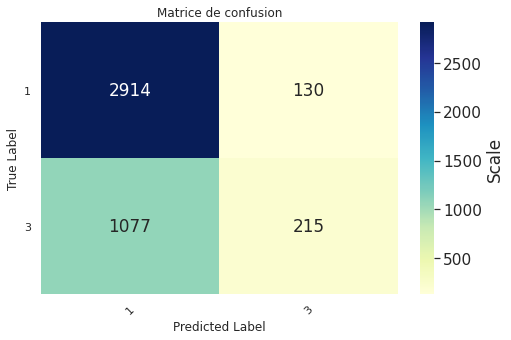

In [8]:
#from sklearn import metrics


y_pred = pipe.predict(X_test)

MyshowAllScores(y_test,y_pred)


### Test d'un calssifieur sur la colonne text avec quelques prétraitement 


In [9]:
# création du pipeline en ajoutant le classifier
pipe = Pipeline([("cleaner", TextNormalizer(lowercase=True ,removestopwords=True,removedigit=True)),
                 ("count_vectorizer", CountVectorizer(lowercase=False)),
                 ("SVM", SVC())])
pipe.fit(X_train,y_train)

print("pipeline créé")

pipeline créé


Accuracy : 0.726
Classification Report
              precision    recall  f1-score   support

           1    0.73548   0.95269   0.83011      3044
           3    0.63359   0.19272   0.29555      1292

    accuracy                        0.72625      4336
   macro avg    0.68453   0.57271   0.56283      4336
weighted avg    0.70512   0.72625   0.67083      4336



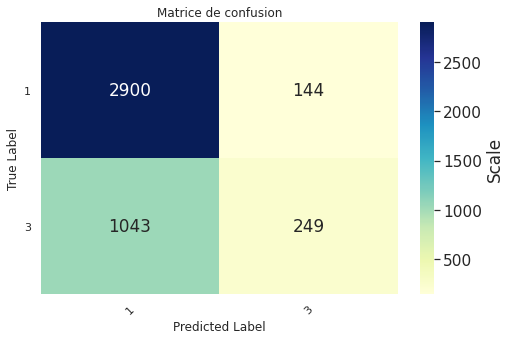

In [10]:
y_pred = pipe.predict(X_test)

MyshowAllScores(y_test,y_pred)


### Tester la crosse validation 

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# selection des données
X=dfVF.text
y=dfVF.truthRating


seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)


scoring = 'accuracy'


score = cross_val_score(pipe, X, y, cv=k_fold, scoring=scoring)
print('Les différentes accuracy pour les 10 évaluations sont',score,'\n')
print ('Accuracy moyenne : ',score.mean(),' standard deviation', score.std())   

Les différentes accuracy pour les 10 évaluations sont [0.72683264 0.71853389 0.71072664 0.71487889 0.7183391  0.70934256
 0.72387543 0.72318339 0.72179931 0.70311419] 

Accuracy moyenne :  0.7170626043925015  standard deviation 0.007103753829680424


In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# selection des données
X=dfVF.text_lem
y=dfVF.truthRating


seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)


scoring = 'accuracy'


score = cross_val_score(pipe, X, y, cv=k_fold, scoring=scoring)
print('Les différentes accuracy pour les 10 évaluations sont',score,'\n')
print ('Accuracy moyenne : ',score.mean(),' standard deviation', score.std())   

Les différentes accuracy pour les 10 évaluations sont [0.7219917  0.71991701 0.71349481 0.71349481 0.7183391  0.71349481
 0.72318339 0.72387543 0.71764706 0.71487889] 

Accuracy moyenne :  0.7180317018191216  standard deviation 0.003896894936692103


In [49]:
# selection des données
X=dfVF.text_l
y=dfVF.truthRating


seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)


scoring = 'accuracy'


score = cross_val_score(pipe, X, y, cv=k_fold, scoring=scoring)
print('Les différentes accuracy pour les 10 évaluations sont',score,'\n')
print ('Accuracy moyenne : ',score.mean(),' standard deviation', score.std())   

Les différentes accuracy pour les 10 évaluations sont [0.72683264 0.71853389 0.71072664 0.71487889 0.7183391  0.70934256
 0.72387543 0.72318339 0.72179931 0.70311419] 

Accuracy moyenne :  0.7170626043925015  standard deviation 0.007103753829680424


### Tester l'accuracy de plusieurs classifieur 

paramétrage par defaut des classifieurs 

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# selection des données
X=dfVF.text
y=dfVF.truthRating

count_vect = CountVectorizer()
datatarget = dfVF['truthRating']

print(datatarget.shape)

X_train_counts = count_vect.fit_transform(dfVF.text)
print(X_train_counts.shape)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print(X_train_tf.shape)

validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30

X_train,X_test,y_train,y_test=train_test_split(X_train_tf, 
                                               datatarget, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

seed=7
models = [
            'ADB',
            'GBC',
            'RFC',
            'KNC',
            'SVC',
            'logisticRegression'
         ]
clfs = [
        AdaBoostClassifier(random_state=seed),
        GradientBoostingClassifier(random_state=seed),
        RandomForestClassifier(random_state=seed,n_jobs=-1),
        KNeighborsClassifier(n_jobs=-1),
        SVC(random_state=seed,probability=True),
        LogisticRegression(solver='lbfgs',max_iter = 20000)
        ]

params = {
            models[0]:{},
    
            models[1]:{},
    
            models[2]:{},
    
            models[3]:{},
    
            models[4]:{},
    
            models[5]:{}
         }

y_test = 0
test_scores = []


for name, estimator in zip(models,clfs):
    print(name)
    clf = GridSearchCV(estimator, params[name], scoring='accuracy',
                       refit='True', n_jobs=-1, cv=5)
    clf.fit(X_train, y_train)

    
    print("scores: " + str(clf.best_score_))
    estimates = clf.predict_proba(X_test)
    

(14452,)
(14452, 19147)
(14452, 19147)
ADB
scores: 0.6941176470588235
GBC
scores: 0.6948096885813149
RFC
scores: 0.6918108419838523
KNC
scores: 0.6620530565167244
SVC
scores: 0.696885813148789
logisticRegression
scores: 0.6975778546712803


In [ ]:
On décide de 

### Classification avec plusieurs features 

In [27]:
def piplineClassification(df,colonnes,clf,target) :
    
    text_clf = Pipeline([
     ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(use_idf=True)),
     ('clf', clf), ])
    
    colonnesTrain = colonnes
    datatarget = df[target]
    
    trainset = df[colonnesTrain]
    trainset = trainset.apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

    validation_size=0.3 #30% du jeu de données pour le test

    testsize= 1-validation_size
    seed=30

    X_train,X_test,y_train,y_test=train_test_split(trainset, 
                                               datatarget, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)
    text_clf.fit(X_train, y_train)
    print("prediction avec les features: ")
    print(colonnesTrain)
    result = text_clf.predict(X_test)
    print('\n accuracy :',accuracy_score(result, y_test),'\n')

    conf = confusion_matrix(y_test, result)
    print ('\n matrice de confusion \n',conf)
    print ('\n',classification_report(y_test, result))
    return 
    
  

## Tache 2 : VRAIS, FAUX / MIXTURE

## Tache 3 : VRAIS / FAUX / MIXTURE